In [1]:
#IMPORTING THE REQUIRED PACKAGES
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta
from scipy.stats import ttest_1samp
import os
from scipy import stats

In [2]:
#OPENING THE RELEVANT FILES FROM DESKTOP
AttackMaster = pd.read_excel("/Users/leotaalas/Desktop/Thesis/Master Data/Attack Master Final .xlsx")
IndexReturns = pd.read_excel("/Users/leotaalas/Desktop/Thesis/Master Data/Index Returns Final.xlsx")
StockPriceReturns = pd.read_excel("/Users/leotaalas/Desktop/Thesis/Master Data/StockPrice Returns Final.xlsx")

#LIMITING THE ANALYSIS TO COMAPNIES IN NYSE/NASDAQ: UNCOMMENT TO RESTRICT ANALYSIS
#Valuestocut = ["NYSE"]
#Valuestocut = ["NASDAQ"]
#AttackMaster = AttackMaster[~AttackMaster['Market'].isin(Valuestocut)]

#LIMITING THE ANALYSIS TO COMAPNIES IN DIFFERENT INDUSTRIES: UNCOMMENT TO RESTRICT ANALYSIS
#Valuestocut = ["BSO","BSR"]
#Valuestocut = ["BSR","BSF"]
#Valuestocut = ["BSO","BSF"]
#AttackMaster = AttackMaster[~AttackMaster['Type of organization'].isin(Valuestocut)]

In [3]:
#FINDING THE CORRECT LOCATION IN THE STOCK DATA AND CHOOSING THE STARTING AND END POITS OF THE MODEL
StockLoc = []
for i in range(len(AttackMaster)):
    temp = AttackMaster.iloc[i]
    keycheck = temp["Key"]
    date = temp["Date Made Public"]
    diff = []
    for j in range(len(StockPriceReturns[keycheck])):
        timediff = StockPriceReturns[keycheck].iloc[j] - date 
        if timediff.days >= 0:
            diff.append(timediff)
        else:
            diff.append(timedelta(10000))
    StockLoc.append((np.argmin(diff),np.argmin(diff)-150,keycheck))

#print(StockLoc)

In [4]:
#FINDING THE CORRECT LOCATION IN THE INDEX DATA AND CHOOSING THE STARTING AND END POITS OF THE MODEL
IndLoc = []
for i in range(len(AttackMaster)):
    temp = AttackMaster.iloc[i]
    keycheck = temp["Key"]
    date = temp["Date Made Public"]
    diff = []
    for j in range(len(IndexReturns[keycheck])):
        timediff = IndexReturns[keycheck].iloc[j] - date 
        if timediff.days >= 0:
            diff.append(timediff)
        else:
            diff.append(timedelta(1000))
    IndLoc.append((np.argmin(diff),np.argmin(diff)-150,keycheck))

#print(IndLoc)

In [5]:
from sklearn.linear_model import LinearRegression

#CREATING STORAGE FOR THE EXPECTED PRICES
predsneg = []
preds = []
preds1 = []
preds2 = []
preds3 = []
preds4 = []
preds5 = []
preds6 = []
preds7 = []
preds8 = []
preds9 = []
preds10 = []
preds11 = []
preds12 = []
preds13 = []
preds14 = []
preds15 = []
preds16 = []
preds17 = []
preds18 = []
preds19 = []
preds20 = []

rpneg = []
rp = []
rp1 = []
rp2 = []
rp3 = []
rp4 = []
rp5 = []
rp6 = []
rp7 = []
rp8 = []
rp9 = []
rp10 = []
rp11 = []
rp12 = []
rp13 = []
rp14 = []
rp15 = []
rp16 = []
rp17 = []
rp18 = []
rp19 = []
rp20 = []

#CREATING STORAGE FOR THE MODELS 
coefficients_list = []
intercepts_list = []

for i in range (len(AttackMaster)):
    temp = AttackMaster.iloc[i]
    keycheck = temp["Key"]
    
    #ASSIGNING DATES TO EACH OF THE DATES IN THE ANALYSIS
    finaldateInd = IndLoc[i][0] - 15
    firstdateInd = IndLoc[i][1]
    preddateneg = IndLoc[i][0] - 1
    preddate = IndLoc[i][0] 
    preddate1 = IndLoc[i][0]+1
    preddate2 = IndLoc[i][0]+2 
    preddate3 = IndLoc[i][0]+3
    preddate4 = IndLoc[i][0]+4
    preddate5 = IndLoc[i][0]+5
    preddate6 = IndLoc[i][0]+6
    preddate7 = IndLoc[i][0]+7
    preddate8 = IndLoc[i][0]+8
    preddate9 = IndLoc[i][0]+9
    preddate10 = IndLoc[i][0]+10
    preddate11 = IndLoc[i][0]+11
    preddate12 = IndLoc[i][0]+12
    preddate13 = IndLoc[i][0]+13
    preddate14 = IndLoc[i][0]+14
    preddate15 = IndLoc[i][0]+15
    preddate16 = IndLoc[i][0]+16
    preddate17 = IndLoc[i][0]+17
    preddate18 = IndLoc[i][0]+18
    preddate19 = IndLoc[i][0]+19
    preddate20 = IndLoc[i][0]+20

    #RESTRICTING THE INDEXES TO ONLY DATES BEFORE THE EVENT WINDOW FOR MODEL CREATION
    IndDates = IndexReturns[keycheck].iloc[firstdateInd:finaldateInd]
    IndValues = IndexReturns[f"Returns {keycheck}"].iloc[firstdateInd:finaldateInd]

    #FINDING THE VALUES OF THE INDEX USED IN THE MODEL FOR EXPECTED PRICES
    PredValuesneg = IndexReturns[f"Returns {keycheck}"].iloc[preddateneg]  
    PredValues = IndexReturns[f"Returns {keycheck}"].iloc[preddate] 
    PredValues1 = IndexReturns[f"Returns {keycheck}"].iloc[preddate1]
    PredValues2 = IndexReturns[f"Returns {keycheck}"].iloc[preddate2]
    PredValues3 = IndexReturns[f"Returns {keycheck}"].iloc[preddate3]
    PredValues4 = IndexReturns[f"Returns {keycheck}"].iloc[preddate4]
    PredValues5 = IndexReturns[f"Returns {keycheck}"].iloc[preddate5]
    PredValues6 = IndexReturns[f"Returns {keycheck}"].iloc[preddate6]
    PredValues7 = IndexReturns[f"Returns {keycheck}"].iloc[preddate7]
    PredValues8 = IndexReturns[f"Returns {keycheck}"].iloc[preddate8]
    PredValues9 = IndexReturns[f"Returns {keycheck}"].iloc[preddate9]
    PredValues10 = IndexReturns[f"Returns {keycheck}"].iloc[preddate10]
    PredValues11 = IndexReturns[f"Returns {keycheck}"].iloc[preddate11]
    PredValues12 = IndexReturns[f"Returns {keycheck}"].iloc[preddate12]
    PredValues13 = IndexReturns[f"Returns {keycheck}"].iloc[preddate13]
    PredValues14 = IndexReturns[f"Returns {keycheck}"].iloc[preddate14]
    PredValues15 = IndexReturns[f"Returns {keycheck}"].iloc[preddate15]
    PredValues16 = IndexReturns[f"Returns {keycheck}"].iloc[preddate16]
    PredValues17 = IndexReturns[f"Returns {keycheck}"].iloc[preddate17]
    PredValues18 = IndexReturns[f"Returns {keycheck}"].iloc[preddate18]
    PredValues19 = IndexReturns[f"Returns {keycheck}"].iloc[preddate19]
    PredValues20 = IndexReturns[f"Returns {keycheck}"].iloc[preddate20]

    #RESTRICTING THE STOCK VALUES TO ONLY DATES BEFORE THE EVENT WINDOW FOR MODEL CREATION
    finaldatestock = StockLoc[i][0] - 15
    firstdatestock = StockLoc[i][1]
    StockDates = StockPriceReturns[keycheck].iloc[firstdatestock:finaldatestock]
    StockValues = StockPriceReturns[f"Returns {keycheck}"].iloc[firstdatestock:finaldatestock]
    
    #RESHAPING THE STORAGE TO ALLOW FOR 1 FEATURE MODELING
    StockValues = np.array(StockValues).reshape(-1,1)
    IndValues = np.array(IndValues).reshape(-1,1)
    PredValuesneg = np.array(PredValuesneg).reshape(-1,1)
    PredValues = np.array(PredValues).reshape(-1,1)
    PredValues1 = np.array(PredValues1).reshape(-1,1)
    PredValues2 = np.array(PredValues2).reshape(-1,1)
    PredValues3 = np.array(PredValues3).reshape(-1,1)
    PredValues4 = np.array(PredValues4).reshape(-1,1)
    PredValues5 = np.array(PredValues5).reshape(-1,1)
    PredValues6 = np.array(PredValues6).reshape(-1,1)
    PredValues7 = np.array(PredValues7).reshape(-1,1)
    PredValues8 = np.array(PredValues8).reshape(-1,1)
    PredValues9 = np.array(PredValues9).reshape(-1,1)
    PredValues10 = np.array(PredValues10).reshape(-1,1)
    PredValues11 = np.array(PredValues11).reshape(-1,1)
    PredValues12 = np.array(PredValues12).reshape(-1,1)
    PredValues13 = np.array(PredValues13).reshape(-1,1)
    PredValues14 = np.array(PredValues14).reshape(-1,1)
    PredValues15 = np.array(PredValues15).reshape(-1,1)
    PredValues16= np.array(PredValues16).reshape(-1,1)
    PredValues17 = np.array(PredValues17).reshape(-1,1)
    PredValues18 = np.array(PredValues18).reshape(-1,1)
    PredValues19 = np.array(PredValues19).reshape(-1,1)
    PredValues20 = np.array(PredValues20).reshape(-1,1)

    #CREATION OF THE MODEL USING INDEX AND STOCK VALUES
    model = LinearRegression()
    model.fit(IndValues,StockValues)

    #USE OF THE MODEL TO CREATE THE EXPECTED VALUES OF THE STOCK PRICE
    predictneg = model.predict(PredValuesneg).flatten().tolist()
    predsneg.append(predictneg[0])
    predict = model.predict(PredValues).flatten().tolist()
    preds.append(predict[0])
    predict1 = model.predict(PredValues1).flatten().tolist()
    preds1.append(predict1[0])
    predict2 = model.predict(PredValues2).flatten().tolist()
    preds2.append(predict2[0])
    predict3 = model.predict(PredValues3).flatten().tolist()
    preds3.append(predict3[0])
    predict4 = model.predict(PredValues4).flatten().tolist()
    preds4.append(predict4[0])
    predict5 = model.predict(PredValues5).flatten().tolist()
    preds5.append(predict5[0])
    predict6 = model.predict(PredValues6).flatten().tolist()
    preds6.append(predict6[0])
    predict7 = model.predict(PredValues7).flatten().tolist()
    preds7.append(predict7[0])
    predict8 = model.predict(PredValues8).flatten().tolist()
    preds8.append(predict8[0])
    predict9 = model.predict(PredValues9).flatten().tolist()
    preds9.append(predict7[0])
    predict10 = model.predict(PredValues10).flatten().tolist()
    preds10.append(predict10[0])
    predict11 = model.predict(PredValues11).flatten().tolist()
    preds11.append(predict11[0])
    predict12 = model.predict(PredValues12).flatten().tolist()
    preds12.append(predict12[0])
    predict13 = model.predict(PredValues13).flatten().tolist()
    preds13.append(predict13[0])
    predict14 = model.predict(PredValues14).flatten().tolist()
    preds14.append(predict14[0])
    predict15 = model.predict(PredValues15).flatten().tolist()
    preds15.append(predict15[0])
    predict16 = model.predict(PredValues16).flatten().tolist()
    preds16.append(predict16[0])
    predict17 = model.predict(PredValues17).flatten().tolist()
    preds17.append(predict17[0])
    predict18 = model.predict(PredValues18).flatten().tolist()
    preds18.append(predict18[0])
    predict19 = model.predict(PredValues19).flatten().tolist()
    preds19.append(predict19[0])
    predict20 = model.predict(PredValues20).flatten().tolist()
    preds20.append(predict20[0])

    #SAVING EACH MODELS COEFFICIENTS AND INTERCEPTS 
    coefficients = model.coef_
    intercepts = model.intercept_
    coefficients_list.append(coefficients[0][0])
    intercepts_list.append(intercepts[0])

    #ADDING THE REAL RETURN OF THAT DAY
    rpneg.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]-1])
    rp.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]])
    rp1.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+1])
    rp2.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+2])
    rp3.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+3])
    rp4.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+4])
    rp5.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+5])
    rp6.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+6])
    rp7.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+7])
    rp8.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+8])
    rp9.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+9])
    rp10.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+10])
    rp11.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+11])
    rp12.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+12])
    rp13.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+13])
    rp14.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+14])
    rp15.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+15])
    rp16.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+16])
    rp17.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+17])
    rp18.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+18])
    rp19.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+19])
    rp20.append(StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+20])

#APPENDING THE  REAL RETURNS TO ATTACKMASTER DATABASE
AttackMaster["Real Returns -1"] = rpneg
AttackMaster["Real Returns"] = rp
AttackMaster["Real Returns +1"] = rp1
AttackMaster["Real Returns +2"] = rp2
AttackMaster["Real Returns +3"] = rp3
AttackMaster["Real Returns +4"] = rp4
AttackMaster["Real Returns +5"] = rp5
AttackMaster["Real Returns +6"] = rp6
AttackMaster["Real Returns +7"] = rp7
AttackMaster["Real Returns +8"] = rp8
AttackMaster["Real Returns +9"] = rp9
AttackMaster["Real Returns +10"] = rp10
AttackMaster["Real Returns +11"] = rp11
AttackMaster["Real Returns +12"] = rp12
AttackMaster["Real Returns +13"] = rp13
AttackMaster["Real Returns +14"] = rp14
AttackMaster["Real Returns +15"] = rp15
AttackMaster["Real Returns +16"] = rp16
AttackMaster["Real Returns +17"] = rp17
AttackMaster["Real Returns +18"] = rp18
AttackMaster["Real Returns +19"] = rp19
AttackMaster["Real Returns +20"] = rp20

#APPENDING THE FOUND EXPECTED RETURNS TO ATTACKMASTER DATABASE
AttackMaster["Expected Returns -1"] = predsneg
AttackMaster["Expected Returns"] = preds
AttackMaster["Expected Returns +1"] = preds1
AttackMaster["Expected Returns +2"] = preds2
AttackMaster["Expected Returns +3"] = preds3
AttackMaster["Expected Returns +4"] = preds4
AttackMaster["Expected Returns +5"] = preds5
AttackMaster["Expected Returns +6"] = preds6
AttackMaster["Expected Returns +7"] = preds7
AttackMaster["Expected Returns +8"] = preds8
AttackMaster["Expected Returns +9"] = preds9
AttackMaster["Expected Returns +10"] = preds10
AttackMaster["Expected Returns +11"] = preds11
AttackMaster["Expected Returns +12"] = preds12
AttackMaster["Expected Returns +13"] = preds13
AttackMaster["Expected Returns +14"] = preds14
AttackMaster["Expected Returns +15"] = preds15
AttackMaster["Expected Returns +16"] = preds16
AttackMaster["Expected Returns +17"] = preds17
AttackMaster["Expected Returns +18"] = preds18
AttackMaster["Expected Returns +19"] = preds19
AttackMaster["Expected Returns +20"] = preds20


AttackMaster["Coefs"] = coefficients_list
AttackMaster["Intercepts"] = intercepts_list


In [6]:
#CREATING STORAGE FOR THE ABNORMAL RETURNS
fullarsneg = []
fullars = []
fullars1 = []
fullars2 = []
fullars3 = []
fullars4 = []
fullars5 = []
fullars6 = []
fullars7 = []
fullars8 = []
fullars9 = []
fullars10 = []
fullars11 = []
fullars12 = []
fullars13 = []
fullars14 = []
fullars15 = []
fullars16 = []
fullars17 = []
fullars18 = []
fullars19 = []
fullars20 = []

#CREATING STORAGE FOR THE CUMULATIVE ABNORMAL RETURNS
fullcarsneg = [] 
fullcars = [] 
fullcars1 = []
fullcars2 = []
fullcars3 = []
fullcars4 = []
fullcars5 = []
fullcars6 = []
fullcars7 = []
fullcars8 = []
fullcars9 = []
fullcars10 = []
fullcars11 = []
fullcars12 = []
fullcars13 = []
fullcars14 = []
fullcars15 = []
fullcars16 = []
fullcars17 = []
fullcars18 = []
fullcars19 = []
fullcars20 = []


for i in range (len(AttackMaster)):
    temp = AttackMaster.iloc[i]
    keycheck = temp["Key"]
    #CALCULATING THE ABNORMAL RETURNS OF EACH COMAPNY
    cartempneg =  StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]-1] - temp["Expected Returns -1"] 
    fullarsneg.append(cartempneg * 100)
    cartemp =  StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]] - temp["Expected Returns"] 
    fullars.append(cartemp * 100)
    cartemp1 =  StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+1] - temp["Expected Returns +1"]
    fullars1.append(cartemp1 * 100)
    cartemp2 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+2] - temp["Expected Returns +2"]
    fullars2.append(cartemp2 * 100)
    cartemp3 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+3] - temp["Expected Returns +3"]
    fullars3.append(cartemp3 * 100)
    cartemp4 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+4] - temp["Expected Returns +4"]
    fullars4.append(cartemp4 * 100)
    cartemp5 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+5] - temp["Expected Returns +5"]
    fullars5.append(cartemp5 * 100)
    cartemp6 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+6] - temp["Expected Returns +6"]
    fullars6.append(cartemp6 * 100)
    cartemp7 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+7] - temp["Expected Returns +7"]
    fullars7.append(cartemp7 * 100)
    cartemp8 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+8] - temp["Expected Returns +8"]
    fullars8.append(cartemp8 * 100)
    cartemp9 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+9] - temp["Expected Returns +9"]
    fullars9.append(cartemp9 * 100)
    cartemp10 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+10] - temp["Expected Returns +10"]
    fullars10.append(cartemp10 * 100)
    cartemp11 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+11] - temp["Expected Returns +11"]
    fullars11.append(cartemp11 * 100)
    cartemp12 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+12] - temp["Expected Returns +12"]
    fullars12.append(cartemp12 * 100)
    cartemp13 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+13] - temp["Expected Returns +13"]
    fullars13.append(cartemp13 * 100)
    cartemp14 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+14] - temp["Expected Returns +14"]
    fullars14.append(cartemp14 * 100)
    cartemp15 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+15] - temp["Expected Returns +15"]
    fullars15.append(cartemp15 * 100)
    cartemp16 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+16] - temp["Expected Returns +16"]
    fullars16.append(cartemp16 * 100)
    cartemp17 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+16] - temp["Expected Returns +17"]
    fullars17.append(cartemp17 * 100)
    cartemp18 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+18] - temp["Expected Returns +18"]
    fullars18.append(cartemp18 * 100)
    cartemp19 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+19] - temp["Expected Returns +19"]
    fullars19.append(cartemp19 * 100)
    cartemp20 = StockPriceReturns[f"Returns {keycheck}"][StockLoc[i][0]+20] - temp["Expected Returns +20"]
    fullars20.append(cartemp20 * 100)


    #CALCULATING THE CUMULATIVE ABNORMAL RETURNS OF EACH COMAPNY
    fullcarsneg.append(cartempneg)
    fullcars.append(cartempneg + cartemp)
    fullcars1.append(cartempneg + cartempneg + cartemp + cartemp1)
    fullcars2.append(cartempneg + cartemp + cartemp1 + cartemp2)
    fullcars3.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3)
    fullcars4.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4)
    fullcars5.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5)
    fullcars6.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6)
    fullcars7.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7)
    fullcars8.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8)
    fullcars9.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9)
    fullcars10.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10)
    fullcars11.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11)
    fullcars12.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11 + cartemp12)
    fullcars13.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11 + cartemp12 + cartemp13)
    fullcars14.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11 + cartemp12 + cartemp13 + cartemp14)
    fullcars15.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11 + cartemp12 + cartemp13 + cartemp14 + cartemp15)
    fullcars16.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11 + cartemp12 + cartemp13 + cartemp14 + cartemp15 + cartemp16)
    fullcars17.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11 + cartemp12 + cartemp13 + cartemp14 + cartemp15 + cartemp16 + cartemp17)
    fullcars18.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11 + cartemp12 + cartemp13 + cartemp14 + cartemp15 + cartemp16 + cartemp17 + cartemp18)
    fullcars19.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11 + cartemp12 + cartemp13 + cartemp14 + cartemp15 + cartemp16 + cartemp17 + cartemp18 + cartemp19)
    fullcars20.append(cartempneg + cartemp + cartemp1 + cartemp2 + cartemp3 + cartemp4 + cartemp5 + cartemp6 + cartemp7 + cartemp8 + cartemp9 + cartemp10 + cartemp11 + cartemp12 + cartemp13 + cartemp14 + cartemp15 + cartemp16 + cartemp17 + cartemp18 + cartemp19 + cartemp20)



#ASSIGNING THE ABNORMAL RETURNS OF EACH COMPANY TO THE DATAFRAME
AttackMaster["AR -1"] = fullarsneg
AttackMaster["AR"] = fullars
AttackMaster["AR +1"] = fullars1 
AttackMaster["AR +2"] = fullars2
AttackMaster["AR +3"] = fullars3 
AttackMaster["AR +4"] = fullars4
AttackMaster["AR +5"] = fullars5
AttackMaster["AR +6"] = fullars6
AttackMaster["AR +7"] = fullars7
AttackMaster["AR +8"] = fullars8
AttackMaster["AR +9"] = fullars9
AttackMaster["AR +10"] = fullars10
AttackMaster["AR +11"] = fullars11
AttackMaster["AR +12"] = fullars12
AttackMaster["AR +13"] = fullars13
AttackMaster["AR +14"] = fullars14
AttackMaster["AR +15"] = fullars15
AttackMaster["AR +16"] = fullars16
AttackMaster["AR +17"] = fullars17
AttackMaster["AR +18"] = fullars18
AttackMaster["AR +19"] = fullars19
AttackMaster["AR +20"] = fullars20

#ASSIGNING THE CUMULATIVE ABNORMAL RETURNS OF EACH COMPANY TO THE DATAFRAME
AttackMaster["CAR -1"] = fullcarsneg
AttackMaster["CAR"] = fullcars
AttackMaster["CAR +1"] = fullcars1
AttackMaster["CAR +2"] = fullcars2
AttackMaster["CAR +3"] = fullcars3
AttackMaster["CAR +4"] = fullcars4
AttackMaster["CAR +5"] = fullcars5
AttackMaster["CAR +6"] = fullcars6
AttackMaster["CAR +7"] = fullcars7
AttackMaster["CAR +8"] = fullcars8
AttackMaster["CAR +9"] = fullcars9
AttackMaster["CAR +10"] = fullcars10
AttackMaster["CAR +11"] = fullcars11
AttackMaster["CAR +12"] = fullcars12
AttackMaster["CAR +13"] = fullcars13
AttackMaster["CAR +14"] = fullcars14
AttackMaster["CAR +15"] = fullcars15
AttackMaster["CAR +16"] = fullcars16
AttackMaster["CAR +17"] = fullcars17
AttackMaster["CAR +18"] = fullcars18
AttackMaster["CAR +19"] = fullcars19
AttackMaster["CAR +20"] = fullcars20


#CALCULATING THE COMPLETE CUMULATIVE ABNORMAL RETURNS OVER ALL THE COMPANIES

CARneg = AttackMaster["AR -1"].sum()
CAR = CARneg + AttackMaster["AR"].sum()
CAR1 = CAR + AttackMaster["AR +1"].sum()
CAR2 = CAR1 + AttackMaster["AR +2"].sum()
CAR3 = CAR2 + AttackMaster["AR +3"].sum()
CAR4 = CAR3 + AttackMaster["AR +4"].sum()
CAR5 = CAR4 + AttackMaster["AR +5"].sum()
CAR6 = CAR5 + AttackMaster["AR +6"].sum()
CAR7 = CAR6 + AttackMaster["AR +7"].sum()
CAR8 = CAR7 + AttackMaster["AR +8"].sum()
CAR9 = CAR8 + AttackMaster["AR +9"].sum()
CAR10 = CAR9 + AttackMaster["AR +10"].sum()
CAR11 = CAR10 + AttackMaster["AR +11"].sum()
CAR12 = CAR11 + AttackMaster["AR +12"].sum()
CAR13 = CAR12 + AttackMaster["AR +13"].sum()
CAR14 = CAR13 + AttackMaster["AR +14"].sum()
CAR15 = CAR14 + AttackMaster["AR +15"].sum()
CAR16 = CAR15 + AttackMaster["AR +16"].sum()
CAR17 = CAR16 + AttackMaster["AR +17"].sum()
CAR18 = CAR17 + AttackMaster["AR +18"].sum()
CAR19 = CAR18 + AttackMaster["AR +19"].sum()
CAR20 = CAR19 + AttackMaster["AR +20"].sum()

#CREATING A LIST OF THE CUMULATIVE CUMULATIVE ABNORMAL RETURNS 
setofcars = [CARneg,CAR, CAR1, CAR2, CAR3,CAR4,CAR5,CAR6,CAR7, CAR8,CAR9,CAR10,CAR11,CAR12,CAR13,CAR14,CAR15,CAR16,CAR17,CAR18,CAR19,CAR20]

#FINDING THE AVERAGE CUMULATIVE ABNROMAL RETURNS
setofavgcars = [(num / 63) for num in setofcars]

#print(setofavgcars)

#AttackMaster.head()


In [7]:
#CALCULATING THE CONFIDENCE INTERVALS FOR THE CAAR
setofsums = [CARneg, CAR, CAR1, CAR2, CAR3, CAR4, CAR5, CAR6, CAR7, CAR8, CAR9, CAR10, CAR11, CAR12, CAR13, CAR14, CAR15, CAR16, CAR17, CAR18, CAR19, CAR20]

setofsums = [(num / 63) for num in setofsums]
#SETTING CONFIDENCE LEVELS
confidence_level = 0.95

# CREATING DATAFRAME FOR STORING THE VALUES OF THE CONFIDENCE INTERVALS
confidence_intervals = pd.DataFrame(columns=["Summation", "Lower Bound", "Upper Bound"])

for i, summation in enumerate(setofsums):
    #CALCULATE MEAN AND STD OF THE SUMS 
    mean = summation 
    std_dev = np.std(setofsums) 

    #CALCULATE SAMPLE SIZE
    sample_size = len(setofsums)

    #FIND DEGREES OF FREEDOM
    degrees_of_freedom = sample_size - 1

    #CALCULATE CRITICAL VALUE
    critical_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

    #CALCULATE SE
    standard_error = std_dev / np.sqrt(sample_size)

    #CALCULATE ME
    margin_of_error = critical_value * standard_error

    #CALCULATE LOWER AND UPPER BOUND OF CONFIDENCE
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    #APPEND INTERVALS TO THE DATAFRAME
    confidence_intervals.loc[i] = [summation, lower_bound, upper_bound]

#print(confidence_intervals)

In [8]:
#CALCULATING CONFIDENCE INTERVALS FOR ABNORMAL RETURNS

confidence_ints= []

for column_name in AttackMaster.columns:
    if column_name.startswith('AR'): 
        column_values = AttackMaster[column_name].values
        
        mean = np.mean(column_values)
        std = np.std(column_values)
        
        sample_size = len(column_values)
        
        std_error = std / np.sqrt(sample_size)
        
        confidence_level = 0.95  
        dof = sample_size - 1
        t_value = stats.t.ppf((1 + confidence_level) / 2, dof)
        
        lower_bound = mean - t_value * std_error
        upper_bound = mean + t_value * std_error
        
        confidence_ints.append((column_name, mean, lower_bound, upper_bound))

confidence_df = pd.DataFrame(confidence_ints, columns=['Column', 'Mean', 'Lower Bound', 'Upper Bound'])

#print(confidence_df)

In [9]:
#CROSS SECTIONAL T-TEST

CAARs = [(num / 100) for num in setofavgcars]
middle = AttackMaster[["CAR -1","CAR","CAR +1","CAR +2","CAR +3","CAR +4","CAR +5","CAR +6","CAR +7","CAR +8","CAR +9","CAR +10","CAR +11","CAR +12","CAR +13","CAR +14","CAR +15","CAR +16","CAR +17","CAR +18","CAR +19","CAR +20"]]

#FINDING THE DIFFERENCE BETWEEN CAR AND CAAR AND ** 2 FOR CST

CaarDiff = pd.DataFrame(index=middle.index, columns=[f'(CAR-CAAR){i}' for i in range(len(middle.columns))])
# Loop over each column of 'middle' and 'CAARs' simultaneously
for i, (column_middle, column_CAAR) in enumerate(zip(middle.columns, CAARs)):
    # Calculate the difference between the corresponding 'CAARs' value and the values in 'middle'
    diff = middle[column_middle] - column_CAAR
    squared_diff = diff ** 2
    
    # Assign the squared differences to the corresponding column in 'new_df'
    CaarDiff[f'(CAR-CAAR){i}'] = squared_diff

#FINDING THE FULL STANDARD DEVIATION OF THE CAAR
sigmers = []
for i,col in enumerate(CaarDiff.columns):
    summy = CaarDiff[col].sum()
    sigmoid = np.sqrt((1/(len(AttackMaster) * (len(AttackMaster) - 2))) * summy)
    sigmers.append(sigmoid)

#FINDING THE TSTAT 
teststats = [CAARs[i] / sigmers[i] for i in range(len(CAARs))]

degrees_of_freedom = len(AttackMaster) - 1 


In [10]:
#GENERALIZED SIGN Z

positives = 0
total = 0

#FINDING WHAT PORTION ARE POSITIVE IN ALL THE ARit ARE POSITIVE IN ESTIMATION WINDOW
for i in range(len(AttackMaster)):
    temp = AttackMaster.iloc[i]
    keycheck = temp["Key"]
    StockValues = StockPriceReturns[f"Returns {keycheck}"].iloc[firstdatestock:finaldatestock]

    positives += (StockValues > 0).sum()
    total += (len(StockValues))

    portionpos = positives/total


#WHAT NUMBER OF CAR ARE POSITIVE PER EACH CAR

positive_counts = middle.gt(0).sum()

counts_list = positive_counts.tolist()

#creating the test statistic
zstat = [(i - (len(AttackMaster) * portionpos))/(np.sqrt(len(AttackMaster) * portionpos * (1 - portionpos))) for i in counts_list]



In [11]:
#PVALUE CREATION

t_p_values = [2 * (1 - stats.t.cdf(abs(teststat), degrees_of_freedom)) for teststat in teststats]

# PVALUE CREATION
normal_p_values = [2 * (1 - stats.norm.cdf(abs(teststat))) for teststat in zstat]

data = {'CAAR': [f'{p:.5g}' for p in setofavgcars], 'Cross Sectional T Test Statistics': [f'{teststat:.5g}' for teststat in teststats],
    'Cross Sectional T Test p-values': [f'{p:.5g}' for p in t_p_values],
    'Generalized Sign Z Test Statistics': [f'{teststat:.5g}' for teststat in zstat],
    'Generalized Sign Z Test p-values': [f'{p:.5g}' for p in normal_p_values]}
TestScores = pd.DataFrame(data)

#TestScores.head(23)


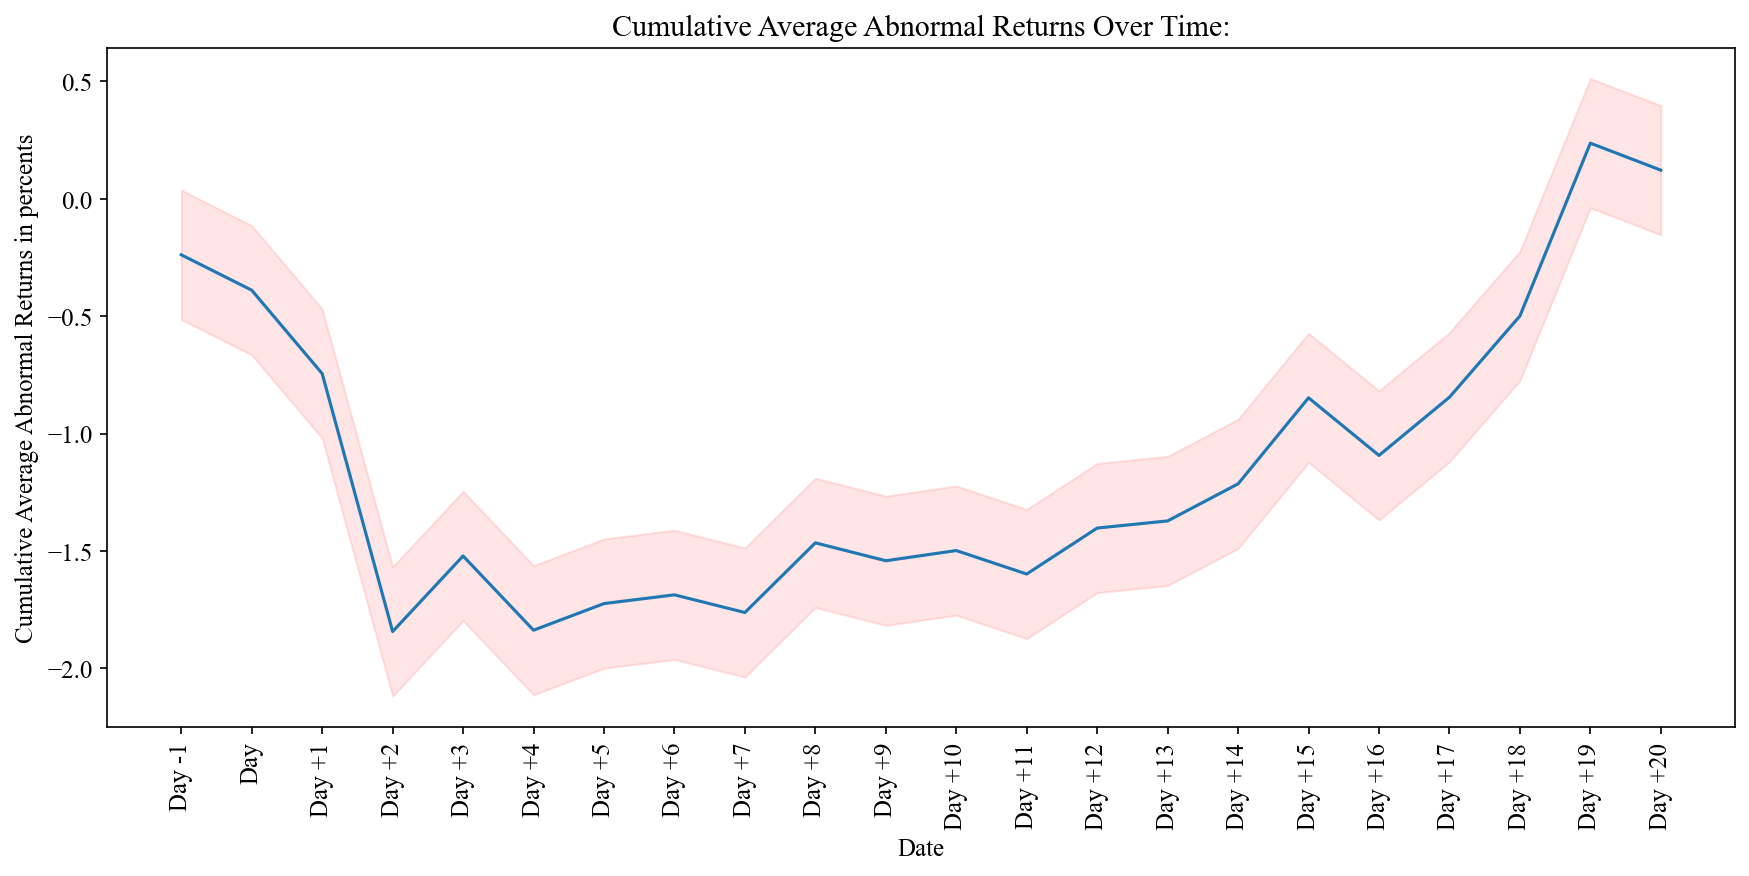

In [12]:
#PLOTTING THE CAAR

import matplotlib.pyplot as plt

import matplotlib as mpl

# Set font properties
font = {'family': 'Times New Roman', 'size': 12}
mpl.rc('font', **font)

mean_values = setofavgcars

plt.figure(figsize=(14, 6), dpi = 150)

plt.plot(mean_values)

plt.fill_between(range(len(mean_values)), confidence_intervals['Lower Bound'], confidence_intervals['Upper Bound'], alpha=0.1, color = "red")

new_xticks = [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]  # Specify the desired tick values
new_xlabels = ['Day -1','Day', 'Day +1', 'Day +2', 'Day +3', 'Day +4', 'Day +5','Day +6','Day +7','Day +8','Day +9','Day +10','Day +11','Day +12','Day +13','Day +14','Day +15','Day +16','Day +17','Day +18','Day +19','Day +20']  # Specify the corresponding tick labels
plt.xticks(new_xticks, new_xlabels)

plt.xlabel('Date')
plt.ylabel('Cumulative Average Abnormal Returns in percents')
plt.title('Cumulative Average Abnormal Returns Over Time:')

plt.xticks(rotation=90)



plt.show()



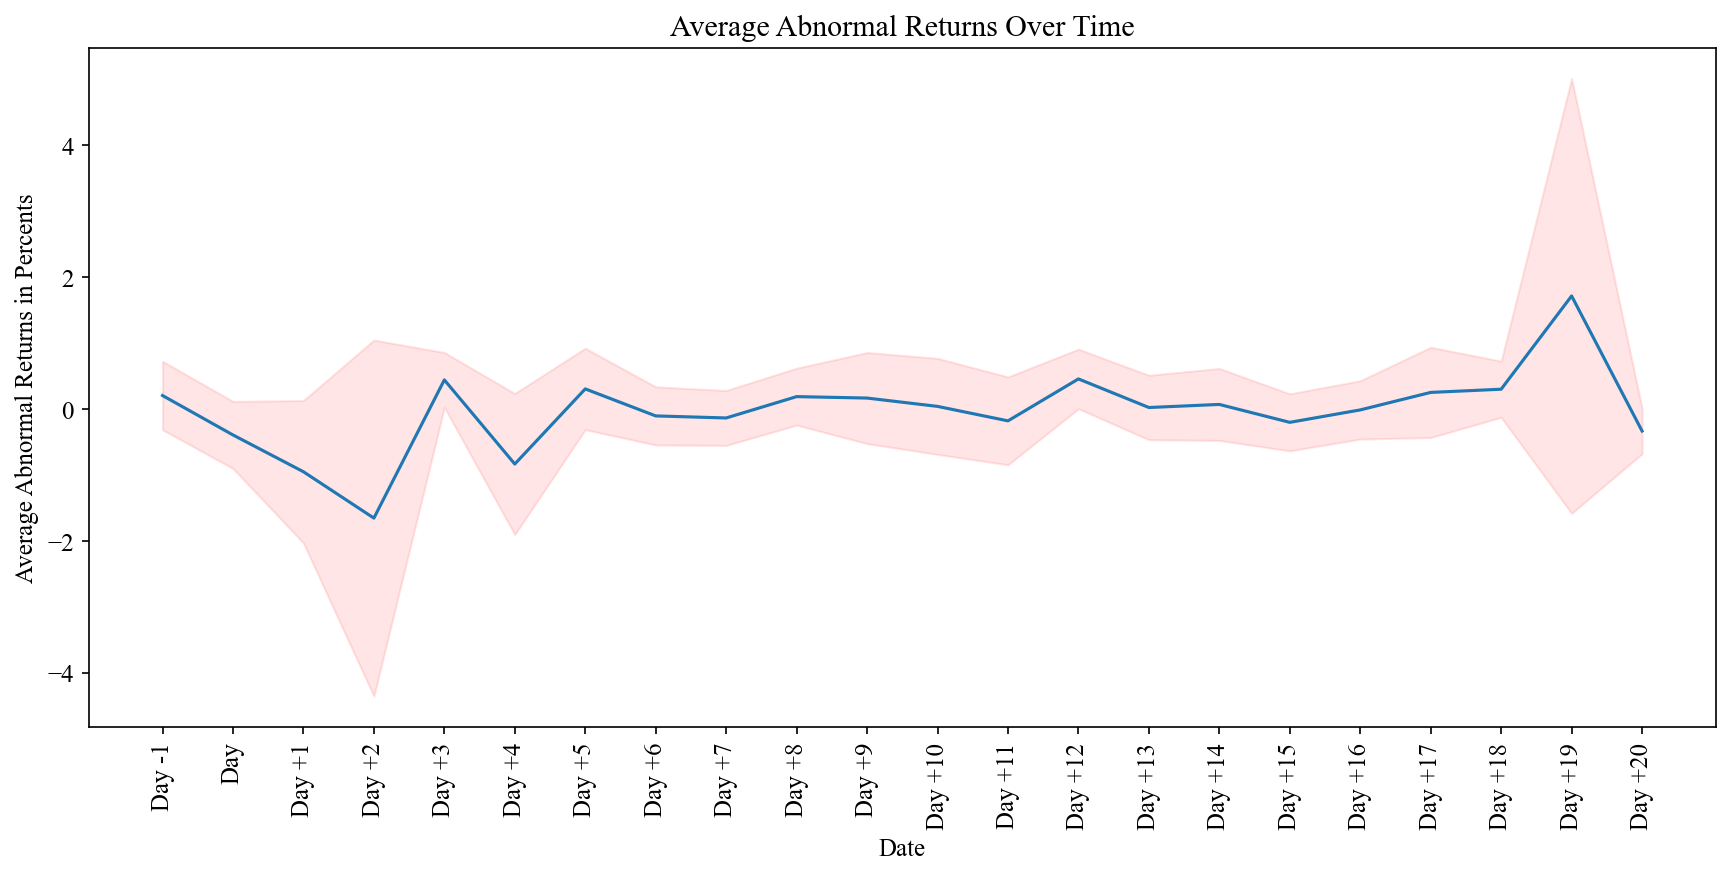

In [106]:
#PLOTTING THE CAAR

import matplotlib.pyplot as plt

import matplotlib as mpl

# Set font properties
font = {'family': 'Times New Roman', 'size': 12}
mpl.rc('font', **font)

mean_values = AttackMaster[["AR -1","AR","AR +1","AR +2","AR +3","AR +4","AR +5","AR +6","AR +7","AR +8","AR +9","AR +10","AR +11","AR +12","AR +13","AR +14","AR +15","AR +16","AR +17","AR +18","AR +19","AR +20"]].mean()

plt.figure(figsize=(14, 6), dpi = 150)

plt.plot(mean_values)

plt.fill_between(range(len(mean_values)), confidence_df['Lower Bound'], confidence_df['Upper Bound'], alpha=0.1, color = "red")

new_xticks = [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]  # Specify the desired tick values
new_xlabels = ['Day -1', 'Day', 'Day +1', 'Day +2', 'Day +3', 'Day +4', 'Day +5','Day +6','Day +7','Day +8','Day +9','Day +10','Day +11','Day +12','Day +13','Day +14','Day +15','Day +16','Day +17','Day +18','Day +19','Day +20']  # Specify the corresponding tick labels
plt.xticks(new_xticks, new_xlabels)

plt.xlabel('Date')
plt.ylabel('Average Abnormal Returns in Percents')
plt.title('Average Abnormal Returns Over Time')

plt.xticks(rotation=90)

plt.show()